# Project 1

## Step 1: Open the `sat_scores.csv` file. Investigate the data, and answer the questions below.


##### 1. What does the data describe?

The data provides average SAT scores (both Math and Verbal) as well as a participation rate for each state. (It's not 100% clear that the rate represents participation, but that seems to be the most logical assumption.)

##### 2. Does the data look complete? Are there any obvious issues with the observations?

The data is complete besides the fact that the rate is ambiguous. It's also unclear if the data represent one year or an average of multiple years.

##### 3. Create a data dictionary for the dataset.

satdata = {}

## Step 2: Load the data.

##### 4. Load the data into a list of lists

In [55]:
import numpy as np
import scipy.stats as stats
import csv
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

with open("/users/timtirrell/DSI-Projects/Week01/project-01/assets/sat_scores.csv",'r') as f:
    reader = csv.reader(f)
    sat_data = [row for row in reader]
  

##### 5. Print the data

In [56]:
for i in range(len(sat_data)):
    print('\t'.join(sat_data[i]))

State	Rate	Verbal	Math
CT	82	509	510
NJ	81	499	513
MA	79	511	515
NY	77	495	505
NH	72	520	516
RI	71	501	499
PA	71	500	499
VT	69	511	506
ME	69	506	500
VA	68	510	501
DE	67	501	499
MD	65	508	510
NC	65	493	499
GA	63	491	489
IN	60	499	501
SC	57	486	488
DC	56	482	474
OR	55	526	526
FL	54	498	499
WA	53	527	527
TX	53	493	499
HI	52	485	515
AK	51	514	510
CA	51	498	517
AZ	34	523	525
NV	33	509	515
CO	31	539	542
OH	26	534	439
MT	23	539	539
WV	18	527	512
ID	17	543	542
TN	13	562	553
NM	13	551	542
IL	12	576	589
KY	12	550	550
WY	11	547	545
MI	11	561	572
MN	9	580	589
KS	9	577	580
AL	9	559	554
NB	8	562	568
OK	8	567	561
MO	8	577	577
LA	7	564	562
WI	6	584	596
AR	6	562	550
UT	5	575	570
IA	5	593	603
SD	4	577	582
ND	4	592	599
MS	4	566	551
All	45	506	514


##### 6. Extract a list of the labels from the data, and remove them from the data.

In [57]:
header = sat_data[0]
del sat_data[0]

##### 7. Create a list of State names extracted from the data. (Hint: use the list of labels to index on the State column)

In [59]:
statelist = []
for i in range(len(sat_data)):
    statelist.append(sat_data[i][0])

##### 8. Print the types of each column

In [60]:
for i in range(4):
    print "%s:\t%s" % (header[i], str(type(sat_data[0][i])))

State:	<type 'str'>
Rate:	<type 'str'>
Verbal:	<type 'str'>
Math:	<type 'str'>


##### 9. Do any types need to be reassigned? If so, go ahead and do it.

Yes, all are strings. Rate, Math, and Verbal should be int.

In [61]:
for i in range(len(sat_data)):
    for j in range(1,4):
        sat_data[i][j] = int(sat_data[i][j])


##### 10. Create a dictionary for each column mapping the State to its respective value for that column. 

In [62]:
ratedict = {}
verbaldict = {}
mathdict = {}

for i in range(len(statelist)):
    ratedict.update({sat_data[i][0]:sat_data[i][1]})
    verbaldict.update({sat_data[i][0]:sat_data[i][2]})
    mathdict.update({sat_data[i][0]:sat_data[i][3]})

##### 11. Create a dictionary with the values for each of the numeric columns

In [63]:
allrateslist = []
allmathslist = []
allverbalslist = []


for i in range(len(statelist)):
    allrateslist.append(sat_data[i][1])
    allmathslist.append(sat_data[i][3])
    allverbalslist.append(sat_data[i][2])
    
allratesdict = {"Rate":allrateslist}
allmathsdict = {"Math":allmathslist}
allverbalsdict = {"Verbal":allverbalslist}


## Step 3: Describe the data

##### 12. Print the min and max of each column

In [64]:
print "Max Rate: " + str(max(allratesdict['Rate']))
print "Min Rate: " + str(min(allratesdict['Rate']))
print "Max Math Score: " + str(max(allmathsdict['Math']))
print "Min Math Score: " + str(min(allmathsdict['Math']))
print "Max Verbal Score: " + str(max(allverbalsdict['Verbal']))
print "Min Verbal Score: " + str(min(allverbalsdict['Verbal']))

Max Rate: 82
Min Rate: 4
Max Math Score: 603
Min Math Score: 439
Max Verbal Score: 593
Min Verbal Score: 482


##### 13. Write a function using only list comprehensions, no loops, to compute Standard Deviation. Print the Standard Deviation of each numeric column.

In [65]:
def stddev(listinput):
    mean = sum([i for i in listinput])/(len(listinput))
    stddev = ((sum([(mean - i)**2 for i in listinput]))/float(len(listinput)))**0.5
    return stddev


## Step 4: Visualize the data

##### 14. Using MatPlotLib and PyPlot, plot the distribution of the Rate using histograms.

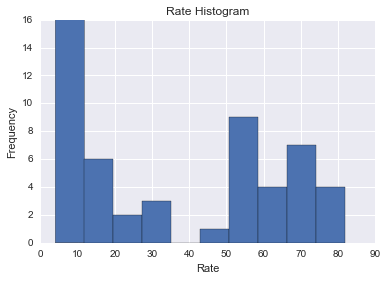

In [66]:
plt.hist(allrateslist)
plt.title("Rate Histogram")
plt.xlabel("Rate")
plt.ylabel("Frequency")
fig = plt.gcf()




##### 15. Plot the Math distribution

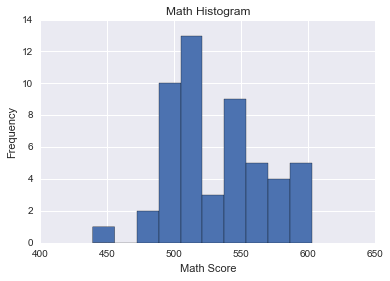

In [67]:
plt.hist(allmathslist)
plt.title("Math Histogram")
plt.xlabel("Math Score")
plt.ylabel("Frequency")
fig = plt.gcf()



##### 16. Plot the Verbal distribution

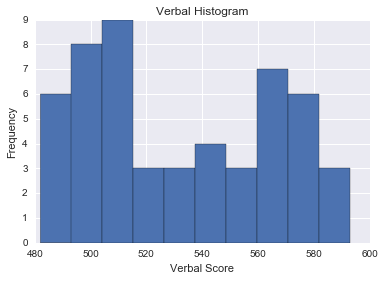

In [68]:
plt.hist(allverbalslist)
plt.title("Verbal Histogram")
plt.xlabel("Verbal Score")
plt.ylabel("Frequency")
fig = plt.gcf()



##### 17. What is the typical assumption for data distribution?

Typcial assumption is that a normal "gaussian" curve would be expected.


##### 18. Does that distribution hold true for our data?

It holds generally true for Math scores -- but not rate or Verbal scores.

##### 19. Plot some scatterplots. **BONUS**: Use a PyPlot `figure` to present multiple plots at once.

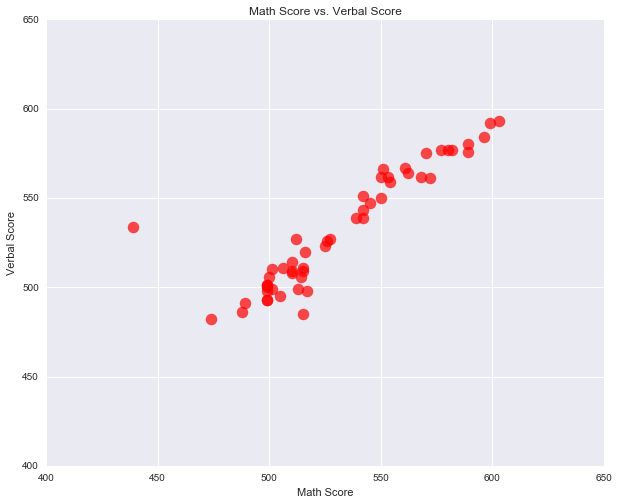

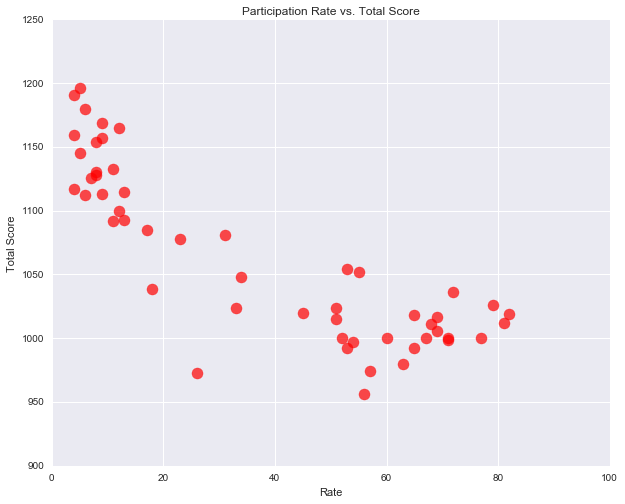

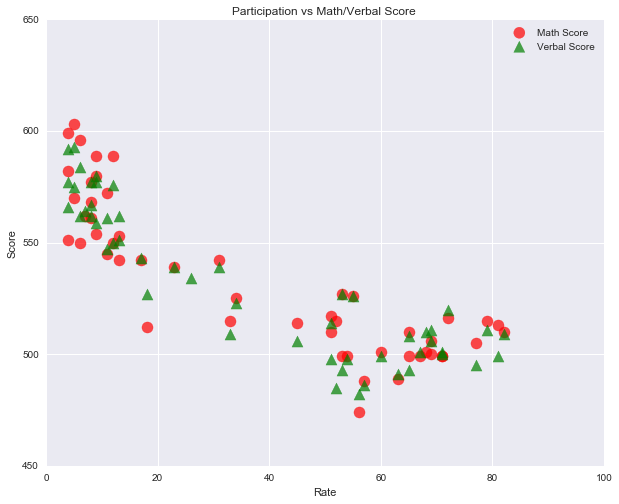

In [98]:
plt.figure(figsize=(10,8))
plt.scatter(allmathslist,
            allverbalslist,
            marker='o',
            color='r',
            alpha=0.7,
            s = 124,)
plt.title('Math Score vs. Verbal Score')
plt.ylabel('Verbal Score')
plt.xlabel('Math Score')
plt.xlim(400,650)
plt.ylim(400,650)
plt.show()
            
            
totalscore = [a+b for a,b in zip(allmathslist,allverbalslist)]
plt.figure(figsize=(10,8))
plt.scatter(allrateslist,
            totalscore,
            marker='o',
            color='r',
            alpha=0.7,
            s = 124,)
plt.title('Participation Rate vs. Total Score')
plt.ylabel('Total Score')
plt.xlabel('Rate')
plt.xlim(0,100)
plt.ylim(900,1250)
plt.show()


plt.figure(figsize=(10,8))
plt.scatter(allrateslist,
            allmathslist,
            marker='o',
            color='r',
            alpha=0.7,
            s = 124,
            label='Math Score')

plt.scatter(allrateslist,
            allverbalslist,
            marker='^',
            color='g',
            alpha=0.7,
            s = 124,
            label='Verbal Score')
plt.title('Participation vs Math/Verbal Score ')
plt.ylabel('Score')
plt.xlabel('Rate')
plt.xlim(0,100)
plt.ylim(450,650)
plt.legend(loc='upper right')
plt.show()

##### 20. Are there any interesting relationships to note?

1) There is a strong relationship between a state's average math score and a state's average verbal score. Each state performs similarly well in both categories.

2) Total score goes down with increased participation until approx. 50% participation. This makes sense as states with low participation likely have fewer schools that require it -- meaning only students that want to take it (and probably studying) are taking the test.



##### 21. Create box plots for each variable. 

{'boxes': [<matplotlib.lines.Line2D at 0x11b2de6d0>],
 'caps': [<matplotlib.lines.Line2D at 0x11beeedd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x119b556d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11bf2f450>],
 'whiskers': [<matplotlib.lines.Line2D at 0x11beeec90>,
  <matplotlib.lines.Line2D at 0x11beee290>]}

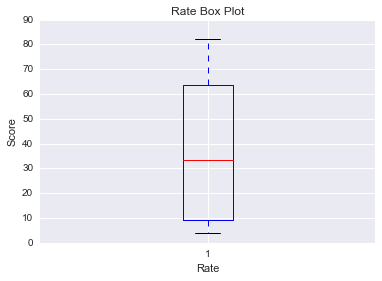

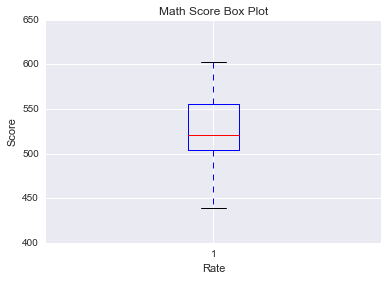

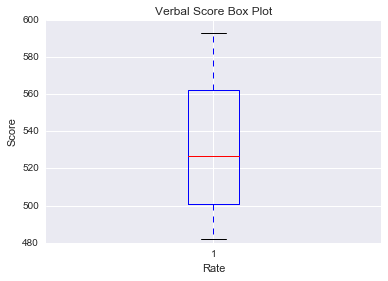

In [104]:
plt.figure()
plt.title('Rate Box Plot')
plt.ylabel('Score')
plt.xlabel('Rate')
plt.boxplot(allrateslist)


plt.figure()
plt.title('Math Score Box Plot')
plt.ylabel('Score')
plt.xlabel('Rate')
plt.boxplot(allmathslist)


plt.figure()
plt.title('Verbal Score Box Plot')
plt.ylabel('Score')
plt.xlabel('Rate')
plt.boxplot(allverbalslist)


##### BONUS: Using Tableau, create a heat map for each variable using a map of the US. 